#                  Logistic Regression using Titanic Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r"c://users/kishore/AI_Hub/Python_DS_ML/2_Logistic Regession/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

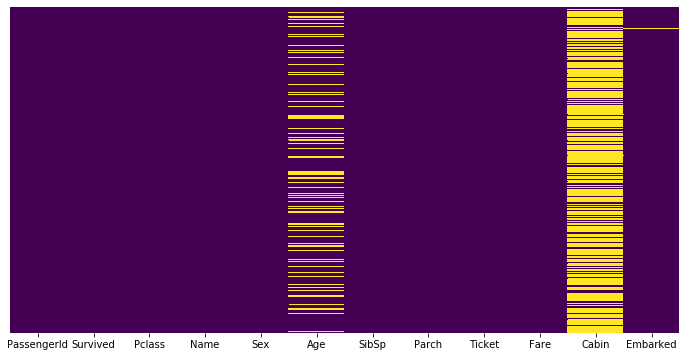

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

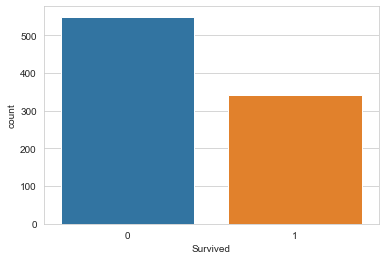

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

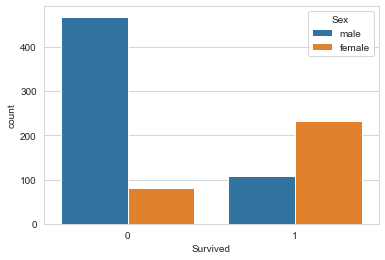

In [108]:
sns.countplot(x='Survived',hue='Sex',data=train)

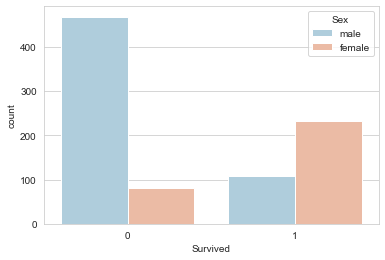

In [109]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

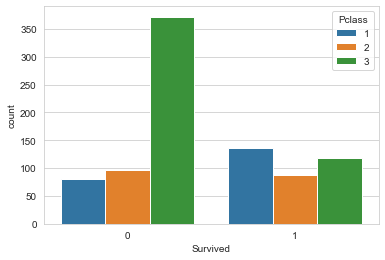

In [110]:
sns.countplot(x='Survived',hue='Pclass',data=train)

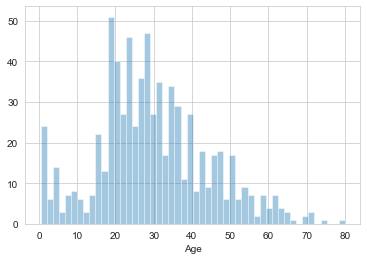

In [111]:
sns.distplot(train['Age'].dropna(),kde=False,bins=50)

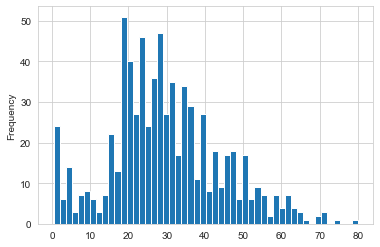

In [112]:
train['Age'].plot.hist(bins=50)

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


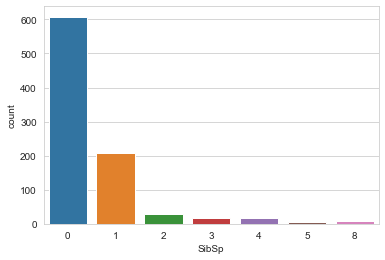

In [114]:
sns.countplot(x='SibSp',data=train)

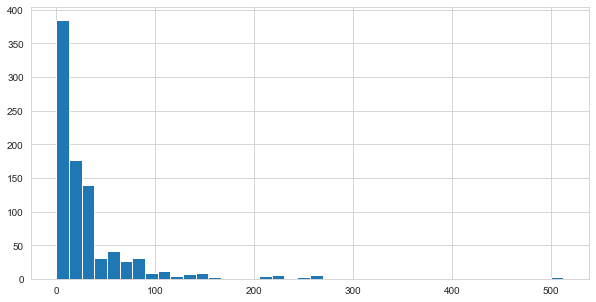

In [115]:
train['Fare'].hist(bins=40,figsize=(10,5))

In [116]:
train['Fare'].max()

512.3292

In [5]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [118]:
train['Fare'].iplot(kind='hist',bins=30)

AttributeError: 'Series' object has no attribute 'iplot'

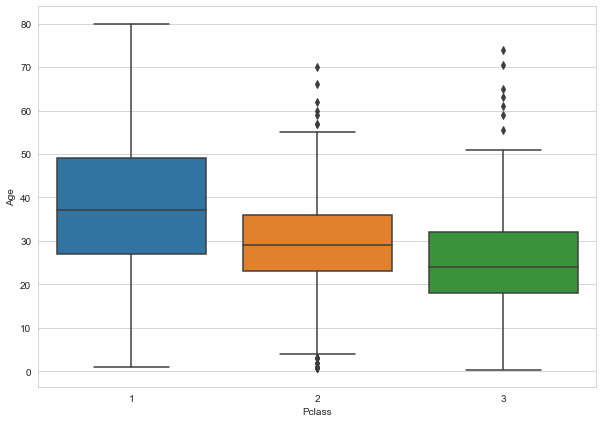

In [119]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [6]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37 
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

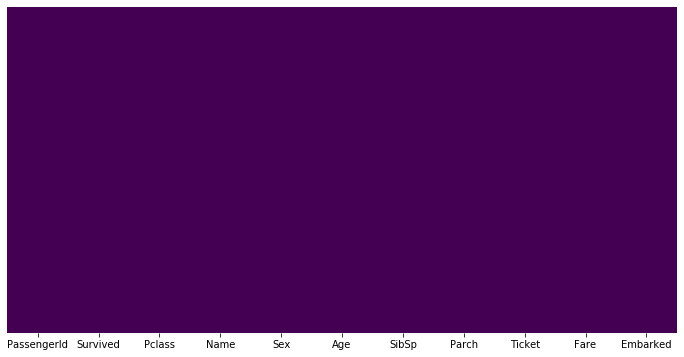

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.drop('Cabin',axis=1,inplace=True)

In [13]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [14]:
train.dropna(inplace=True)

In [15]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [156]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [18]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [22]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel=LogisticRegression()

In [43]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions=logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [47]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)